Histograms and scatters for the Raposo full-rank network used in figure 1.

In [5]:
import sys
sys.path.append('../')
from low_rank_rnns.modules import *
from low_rank_rnns import raposo, helpers, regressions, clustering
import low_rank_rnns.mixedselectivity as ms
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Ellipse

In [6]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[0]

In [7]:
size = 512
alpha = .2
noise_std = 5e-2
x_train, y_train, mask_train, x_val, y_val, mask_val = raposo.generate_data(1000)
net = FullRankRNN(4, size, 1, noise_std, alpha, train_wi=True)
# w0 = net.wrec.detach().numpy().copy()
# train(net, x_train, y_train, mask_train, 40, lr=1e-4)
net.load_state_dict(torch.load('../models/raposo_fr_fig1.pt', map_location='cpu'))

<All keys matched successfully>

In [8]:
loss, acc = raposo.test(net, x_val, y_val, mask_val)
print(loss, acc)

0.0673084706068039 0.9900000095367432


(500, 512)
clusteriness: 0.08407847382761996
data mean: 0.243, mc mean: 0.248
KS 2 sample test: p=0.057180855554882504
Wilcoxon rank-sum test: p=0.26653055657942926
Kruskal-Wallis test: p=0.26653055636566647


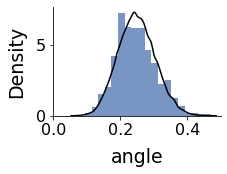

In [9]:
reg_space, _ = regressions.regression_raposo(net)
figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
p_reg, c_reg = ms.epairs(reg_space, 500, figsize=figsize, xlim=(-0., .5), col=color)
# plt.savefig('figure_1/epairs_raposo_reg.pdf', bbox_inches='tight')

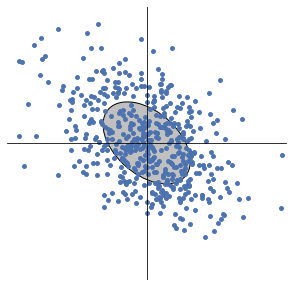

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(reg_space[:, 2], reg_space[:, 3], color=color, s=15)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(reg_space[:, 0]), np.max(reg_space[:, 0]))
ylim = 1.3 * max(-np.min(reg_space[:, 1]), np.max(reg_space[:, 1]))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([reg_space[:, 2], reg_space[:, 3]]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/raposo_reg_scatter.pdf', bbox_inches='tight')